In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

**Homework**

- Create a chart to show how the relative share of various playlist_genres has changed over time
- Create a multiple line chart to show the evolution of the average song properties (only those normalized in the range 0-1 ) over time
- Create a small multiple chart with histograms of track popularity for the different genres. Choose an optimal binning
- Compare the distributions of the average song duration for the different genres using a visualization idiom for statistical analysis
- Create a chart showing the how much the attributes (popularity, danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a proper colormap.
- Visualize a scatter plot with songs released in 2010, representing loudness and danceability on the x-y coordinates, dots colored by genres and using a different mark (pre-attentive) to make a specific artist of your interest evident.

In [2]:
songs = pd.read_csv("spotify_songs.csv")

In [3]:
# Check row and column numbers

rows = songs.shape[0] 
cols = songs.shape[1]
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))


#print(songs.isnull().sum())
songs = songs.dropna() 

# Adding 'release_year' column
songs['year'] = pd.DatetimeIndex(songs['track_album_release_date']).year.astype(int)

songs['duration'] = songs['duration_ms']/1000
songs.sort_values(by='year', ascending=True)
songs.head()

Rows   : 32833
Columns: 23


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [4]:
#how to sort artists
art = songs.groupby(['track_artist']).agg(
    items=('track_id', 'count'),
    popularity=('track_popularity', 'mean')
).sort_values(by='items', ascending=False)


artsel=art[art["items"]>10]
print(artsel)

                  items  popularity
track_artist                       
Martin Garrix       161   47.204969
Queen               136   43.000000
The Chainsmokers    123   57.699187
David Guetta        110   53.436364
Don Omar            102   41.950980
...                 ...         ...
Duran Duran          11   58.090909
Macross 82-99        11   40.272727
Wolfgang Lohr        11   39.454545
MAX                  11   66.272727
Nio Garcia           11   68.363636

[536 rows x 2 columns]


In [5]:
#how to aggregate data
songagg = songs.groupby(['playlist_genre','year']).agg(
    items=('track_id', 'count'),
    popularity=('track_popularity', 'mean')
).reset_index()

songagg.tail()

,playlist_genre,year,items,popularity
297,rock,2016,77,38.155844
298,rock,2017,116,37.112069
299,rock,2018,129,40.968992
300,rock,2019,577,36.178510
301,rock,2020,48,39.458333


**First Question:** Create a chart to show how the relative share of various playlist_genres has changed over time

<Figure size 1500x800 with 0 Axes>

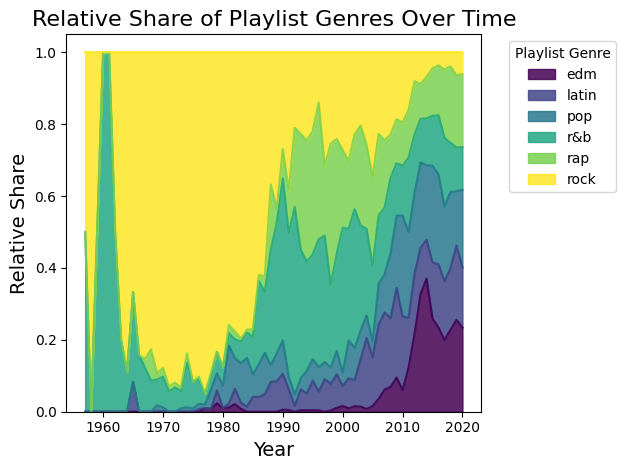

In [6]:
songagg['total_items_for_year'] = songagg.groupby('year')['items'].transform('sum')
songagg['relative_share'] = songagg['items'] / songagg['total_items_for_year']

# Pivot per il grafico
pivot_table = songagg.pivot(index='year', columns='playlist_genre', values='relative_share').fillna(0)

# Creazione del grafico area stacked
plt.figure(figsize=(15, 8))
pivot_table.plot(kind='area', stacked=True, colormap='viridis', alpha=0.85)
plt.title('Relative Share of Playlist Genres Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Relative Share', fontsize=14)
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Second Question:** Create a multiple line chart to show the evolution of the average song properties (only those normalized in the range 0-1 ) over time

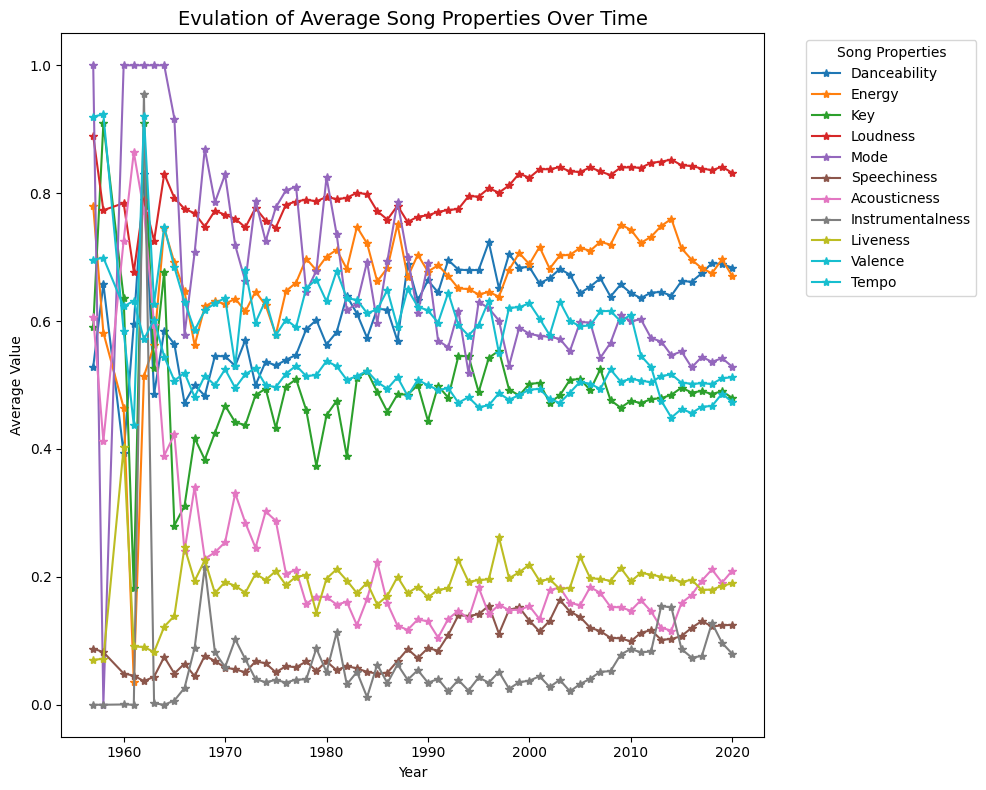

In [14]:
# Select the normalized columns (only those in the range 0-1)
normalized_columns = [
    'danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence', 'tempo'
]
for column in normalized_columns:
    songs[column] = (songs[column] - songs[column].min()) / (songs[column].max() - songs[column].min())

# Calculate the average of each property for each year
songs_avg = songs.groupby('year')[normalized_columns].mean().reset_index()

plt.figure(figsize=(10,8))
colors = plt.cm.tab10(range(len(normalized_columns)))
for i, column in enumerate(normalized_columns):
    plt.plot(songs_avg['year'], songs_avg[column], marker = '*', label = column.capitalize() ,color = colors[i])

plt.title('Evulation of Average Song Properties Over Time', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Value', fontsize=10)
plt.legend(title='Song Properties', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

**Third Question:** Create a small multiple chart with histograms of track popularity for the different genres. Choose an optimal binning

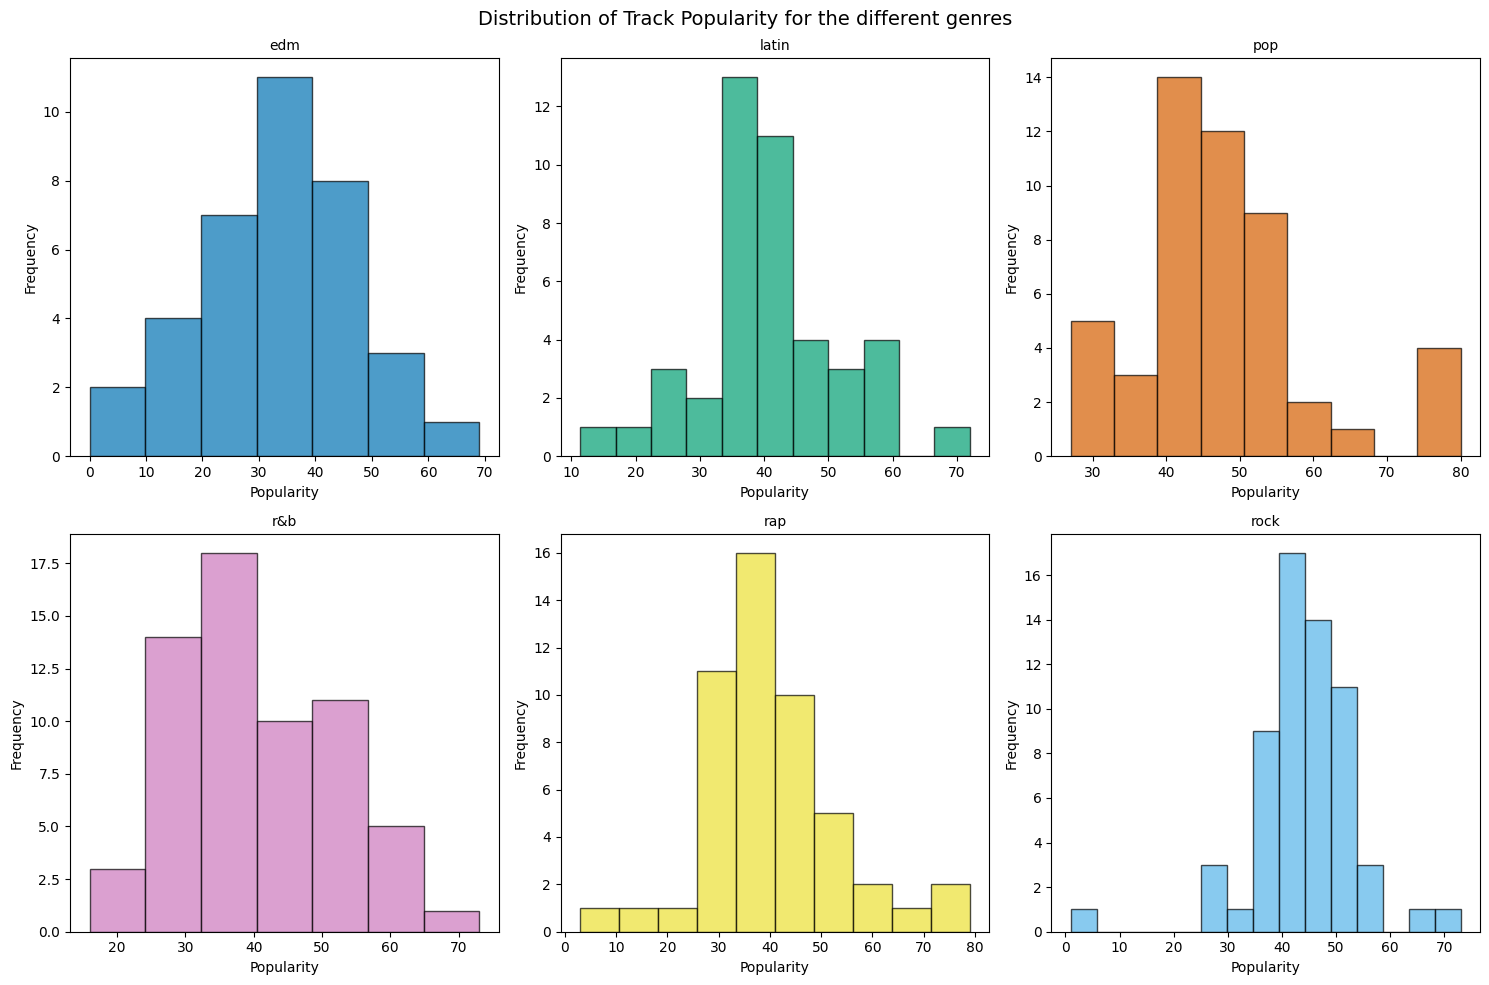

In [12]:
genres = songagg['playlist_genre'].unique()
ncols = 3
nrows = (len(genres) // ncols) + (len(genres) % ncols > 0)
fig, axes = plt.subplots(nrows, ncols, figsize=(15,10))
axes = axes.flatten()
colors = sns.color_palette("colorblind6", len(genres))
for i, genres in enumerate(genres):
    genre_data = songagg[songagg['playlist_genre'] == genres]['popularity']
    optimal_bins = np.histogram_bin_edges(genre_data, bins='auto')
    axes[i].hist(genre_data, bins=optimal_bins, alpha=0.7, color=colors[i], edgecolor='black')
    axes[i].set_title(f"{genres}", fontsize=10)
    axes[i].set_xlabel('Popularity')
    axes[i].set_ylabel('Frequency')

fig.suptitle('Distribution of Track Popularity for the different genres', fontsize=14, color='black')    
plt.tight_layout()
plt.show()

**Forth question:** Compare the distributions of the average song duration for the different genres using a visualization idiom for statistical analysis

First case: With a box-plot 

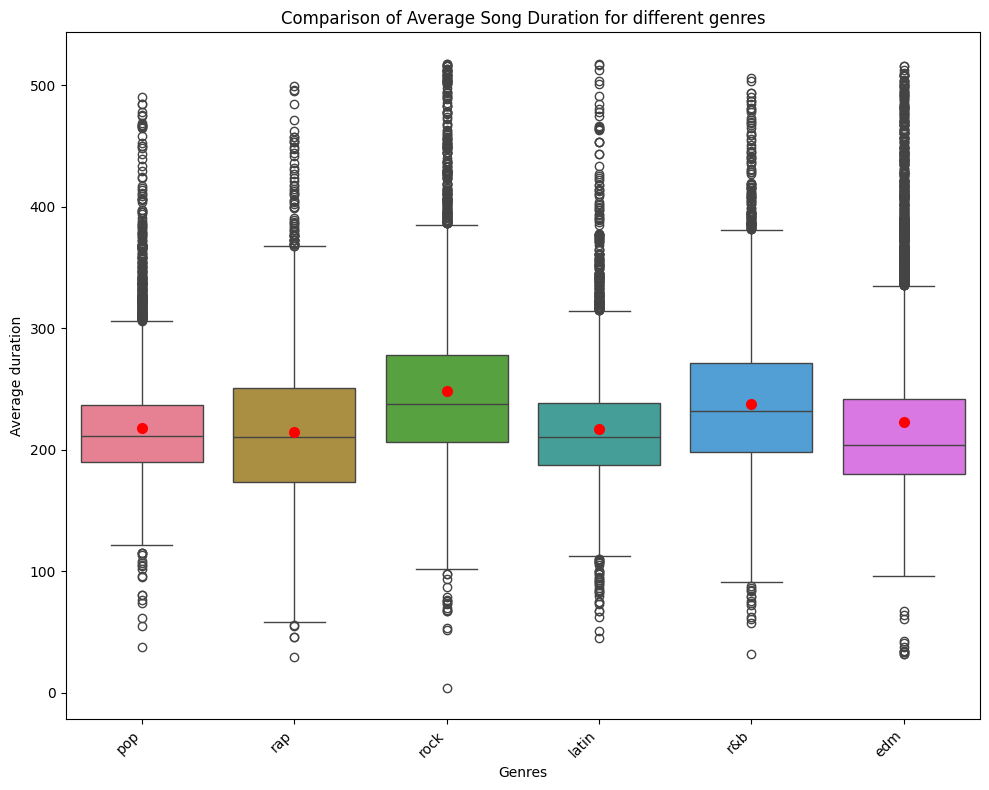

In [40]:
songs_avg_duration = songs.groupby('playlist_genre')['duration'].mean().reset_index()

plt.figure(figsize=(10,8))
sns.boxplot(data=songs, x='playlist_genre', y='duration', hue='playlist_genre', palette='husl')
sns.stripplot(data=songs_avg_duration, x='playlist_genre', y='duration', 
              color='red', size=8, jitter=True)
plt.title('Comparison of Average Song Duration for different genres')
plt.xlabel('Genres')
plt.ylabel('Average duration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Fifth question:** Create a chart showing the how much the attributes (popularity, danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a proper colormap.

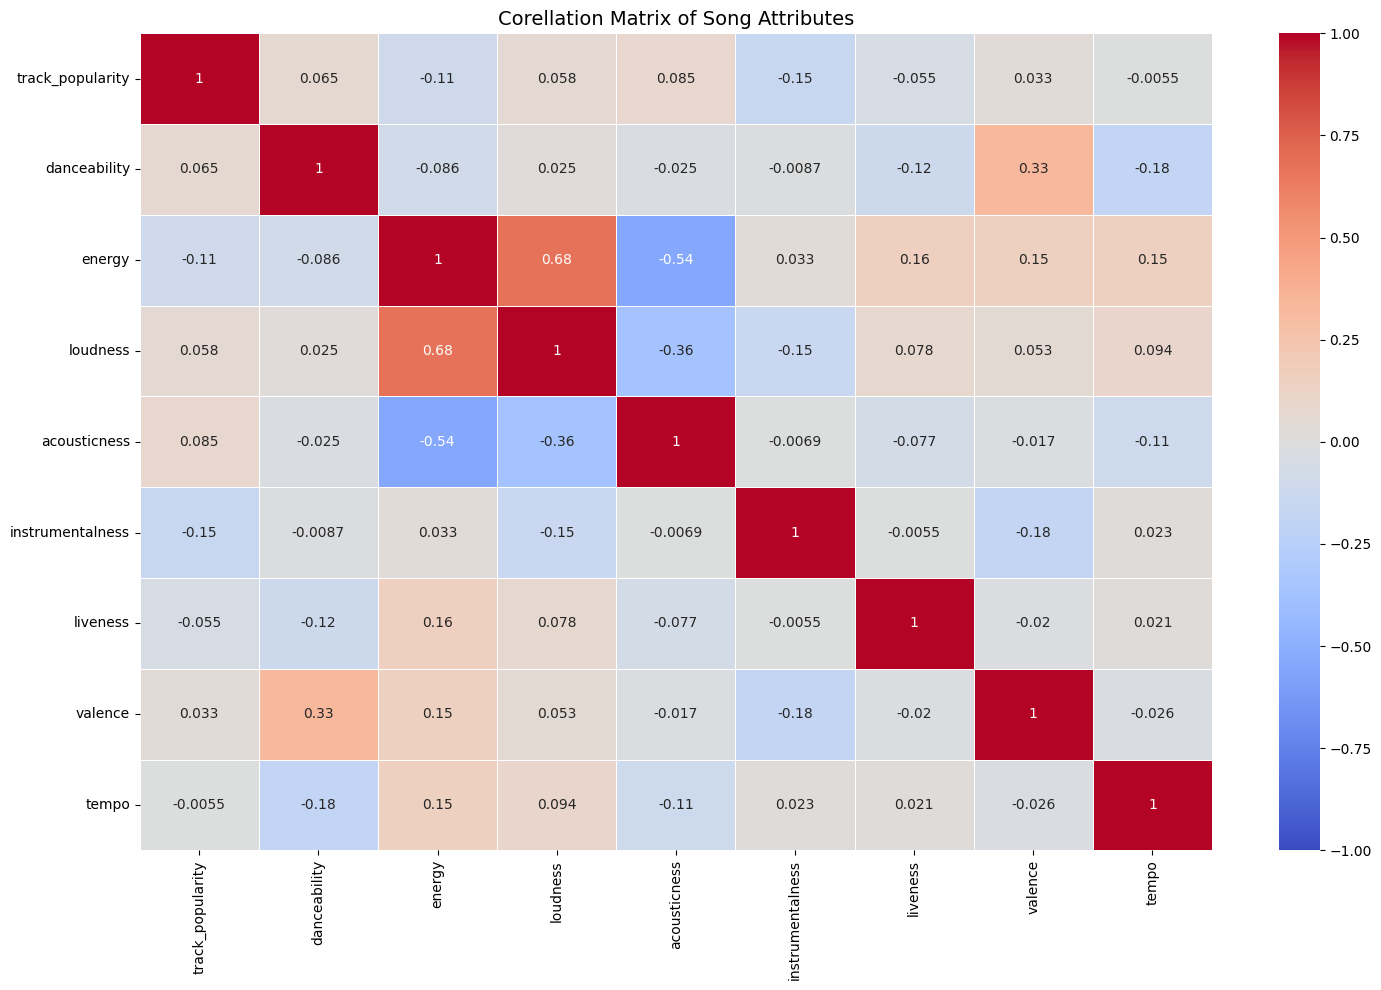

In [17]:
attributes = [
    'track_popularity','danceability','energy','loudness','acousticness','instrumentalness','liveness','valence','tempo'
]
corr_matrix = songs[attributes].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Corellation Matrix of Song Attributes', fontsize=14)
plt.tight_layout()
plt.show()

**Sixth question:** Visualize a scatter plot with songs released in 2010, representing loudness and danceability on the x-y coordinates, dots colored by genres and using a different mark (pre-attentive) to make a specific artist of your interest evident.

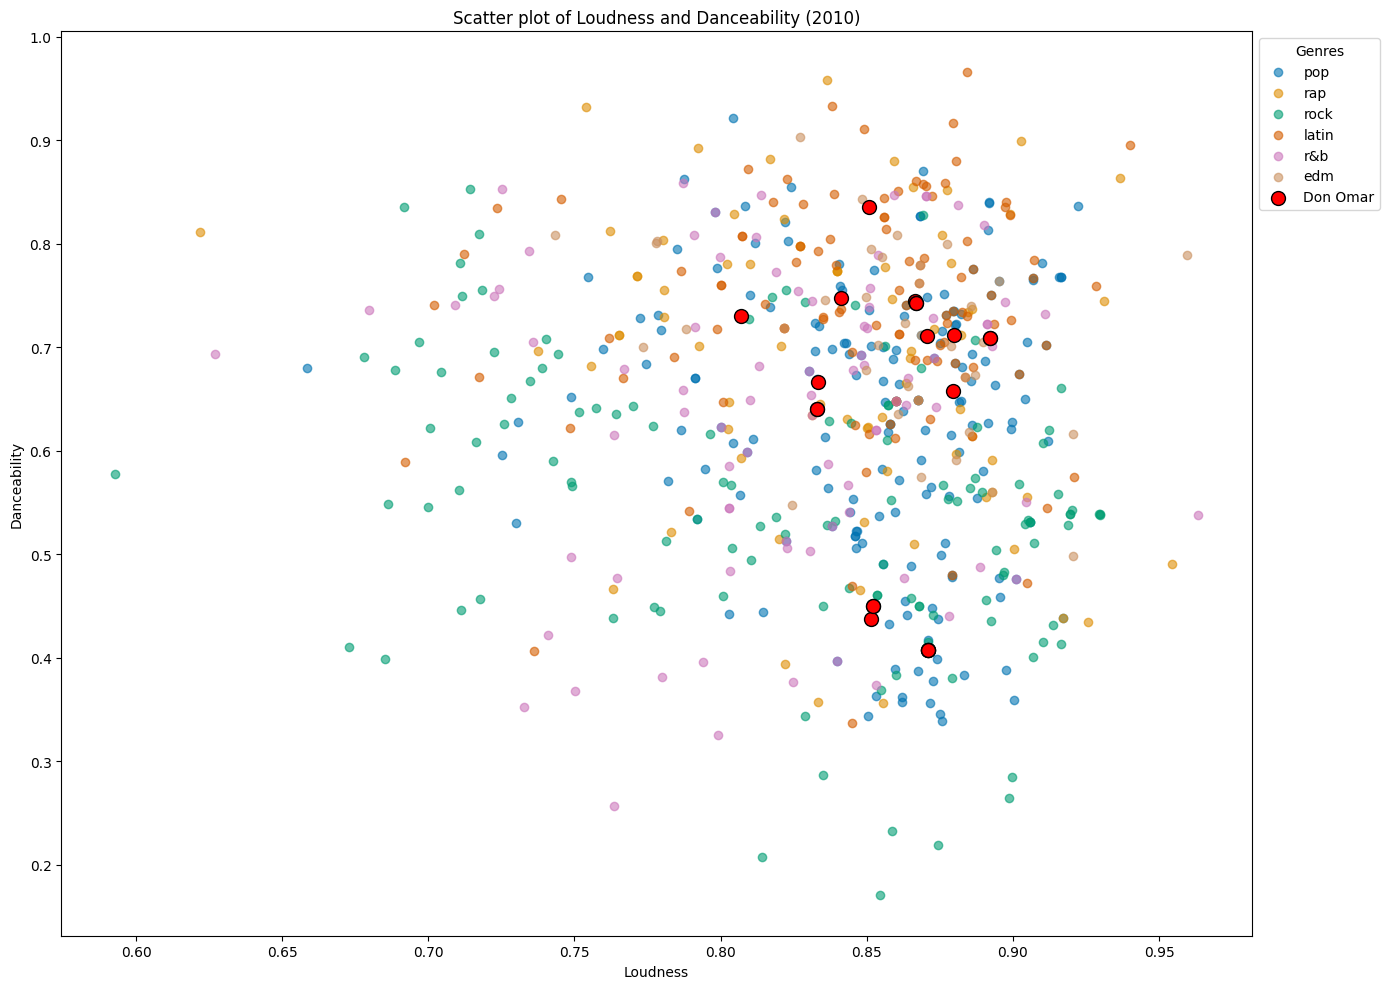

In [20]:
#Filter songs for the year 2010
songs_2010 = songs[songs['year'] == 2010]

#choose the artist to highlight
artist_to_highlight = 'Don Omar'

genre_unique = songs_2010['playlist_genre'].unique()
palette = sns.color_palette('colorblind', len(genre_unique))
genre_colors = {genre: color for genre, color in zip(genre_unique, palette)}

plt.figure(figsize=(14,10))
for genre in genre_unique:
    genre_data = songs_2010[songs_2010['playlist_genre']==genre]
    plt.scatter(genre_data['loudness'], genre_data['danceability'], label=genre, color= genre_colors[genre], alpha=0.6)

#highlight the specific artist with a special marker
artist_data = songs_2010[songs_2010['track_artist'] == artist_to_highlight]
plt.scatter(artist_data['loudness'], artist_data['danceability'], 
            label=f"{artist_to_highlight}", color='red', s=100, marker='o', edgecolor='black')


plt.title('Scatter plot of Loudness and Danceability (2010)', fontsize=12)
plt.xlabel('Loudness', fontsize=10)
plt.ylabel('Danceability', fontsize=10)
plt.legend(title= 'Genres', loc='upper left', bbox_to_anchor = (1,1), fontsize=10)
plt.tight_layout()
plt.show()

In [18]:
artist_counts = songs_2010['track_artist'].value_counts()
print(artist_counts)

track_artist
Don Omar                           21
CASIOPEA                           20
Bon Jovi                           14
Bruno Mars                         11
Rihanna                            10
                                   ..
Triumph                             1
Tom Petty and the Heartbreakers     1
Judas Priest                        1
Siakol                              1
Generation DJ                       1
Name: count, Length: 333, dtype: int64
